## Project:

Data from:` https://archive.ics.uci.edu/ml/machine-learning-databases/adult/`


Problem 1:
Prediction task is to determine whether a person makes over 50K a year.

Problem 2:
Which factors are important

Problem 3:
Which algorithms are best for this dataset

In [1]:
## Project -03
# Machine Learning:

In [1]:
# Import necessary library:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the dataset:
#load the train and test data
train =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header = None)
    

In [3]:
 train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
## Since the dataset doesn't have columns , now we have it.
train.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
           'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country',
           'income']

In [5]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                 skiprows = 1, header = None)

In [7]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
# test data too doesn't have the column name. Let give the names.
test.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
           'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country',
           'income']

In [9]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Cleaning the Data:

In [11]:
# First combine train and test data to one dataframe.
df=pd.concat([train,test])   # by default axis=0,  where axis= 0 is 'index' wise.

In [12]:
df.shape

(48842, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [14]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df.head()  # first 5 rows displaying

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


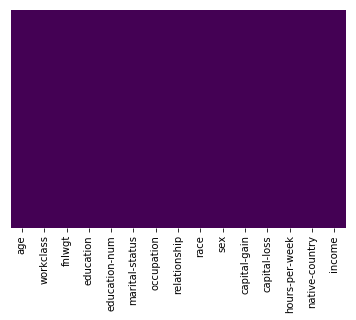

In [16]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
## dark yellow color = is yes the column value have the missing value.
## we see there is no missing value .

In [17]:
df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [18]:
df.isnull().sum().sum()

0

In [19]:
# There may be  presence of '?' values in dataset:
#df.columns,(df.values.astype(str)=='?').sum(axis=0)
for col in df.columns:
    if df[col].dtype==object:
            print(col,(df[col].str.contains('\?')==True).sum())        

workclass 2799
education 0
marital-status 0
occupation 2809
relationship 0
race 0
sex 0
native-country 857
income 0


In [20]:
df[(df.occupation.values!='?')]      # not contaiing ? values

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [21]:
columns_with_na_valu=['workclass','occupation','native-country']

In [23]:
df.loc[(df==0).all(axis=1)].shape

(0, 15)

In [24]:
for col in columns_with_na_valu:
    df[col]=(df[col].replace('?',np.nan ))

In [25]:
df=df.dropna()

In [26]:
df.shape

(48842, 15)

In [27]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [28]:
for col in df.columns:
    if df[col].dtype==object:
        df[col]=df[col].astype('category')

In [29]:
df.dtypes     # checking if object changed to category

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null category
fnlwgt            48842 non-null int64
education         48842 non-null category
education-num     48842 non-null int64
marital-status    48842 non-null category
occupation        48842 non-null category
relationship      48842 non-null category
race              48842 non-null category
sex               48842 non-null category
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null category
income            48842 non-null category
dtypes: category(9), int64(6)
memory usage: 3.0 MB


In [31]:
display(df.corr())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [32]:
# We see in above that none of columns are highly correlated.

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.preprocessing as preprocessing

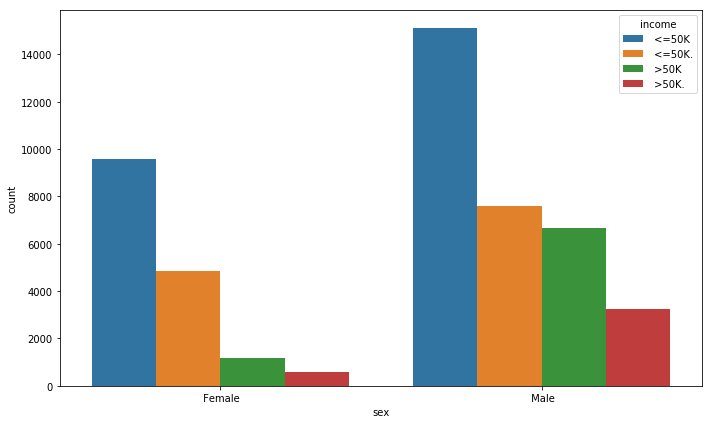

In [34]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='sex',hue='income',data=df)
plt.tight_layout()
plt.show()

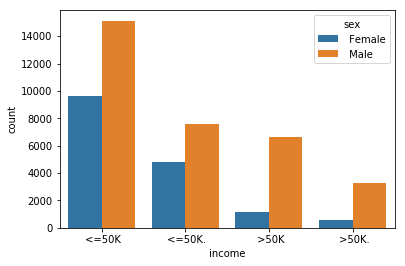

In [35]:
sns.countplot(x='income',data=df,hue='sex')

In [36]:
# From above we can see than  majority of make less than $50k a year. 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null category
fnlwgt            48842 non-null int64
education         48842 non-null category
education-num     48842 non-null int64
marital-status    48842 non-null category
occupation        48842 non-null category
relationship      48842 non-null category
race              48842 non-null category
sex               48842 non-null category
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null category
income            48842 non-null category
dtypes: category(9), int64(6)
memory usage: 4.3 MB


In [38]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


KeyboardInterrupt: 

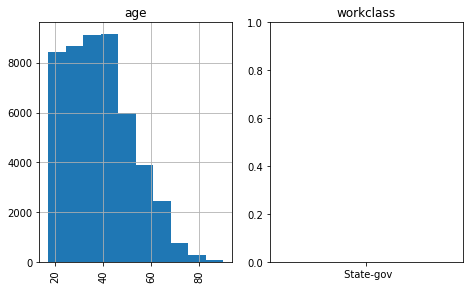

In [34]:
import math
# Reference: www.valentinmihov.com
fig=plt.figure(figsize=(20,15))
cols=5
rows=math.ceil(float(df.shape[1])/cols)
for i, column in enumerate(df.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if df.dtypes[column]==np.object:
        df[column].value_counts().plot(kind="bar",axes=ax)
    else:    
        df[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7,wspace=0.2)    

In [35]:
# we can see from the plots above our data is mostly concentrated in the U.S with mostly male white
# people. This is good thing to notice ,as it may impact the conclusion we come latter on.

In [39]:
# encoding the categorical features as numbers
def number_encode_features(df):
    result=df.copy()
    encoders={}
    for column in result.columns:
        if result.dtypes[column]==np.object:
            encoders[column]=preprocessing.LabelEncoder()
            result[column]=encoders[column].fit_transform(result[column])
    return result,encoders        

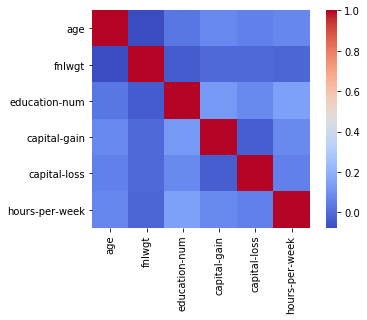

In [40]:
# calculate the correlation and plot it:
encoded_data, _= number_encode_features(df)
sns.heatmap(encoded_data.corr(),cmap='coolwarm',square=True)
plt.show()

In [38]:
# From above heatmap the correlation between education and education-num has high, which we will look 
# the relation between them in below later.

In [41]:
## changing the income to two categorical.
df['income']=df['income'].apply(lambda x: 1 if x==" >50K" else 0)

In [40]:
df.head()   # just to make sure.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [41]:
# we can see '?' in dataset. Remove it.
#df.replace('?',np.nan,inplace=True)   # Making a copy for visualization

In [42]:
df.shape    # shape of dataframe

(48842, 15)

C:\Users\minga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\minga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\minga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\minga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


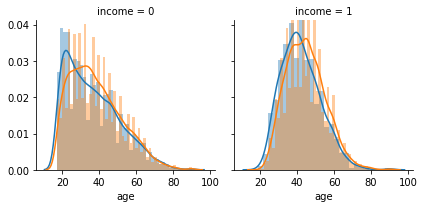

In [43]:
g=sns.FacetGrid(data=df,col='income',hue='sex')
g.map(sns.distplot,'age')

In [ ]:



# It is noticed that , the people of midcareer make over $50K.

In [42]:
df['native-country'].value_counts()/df.shape[0]


 United-States                 0.897424
 Mexico                        0.019471
 ?                             0.017546
 Philippines                   0.006040
 Germany                       0.004218
 Puerto-Rico                   0.003767
 Canada                        0.003726
 El-Salvador                   0.003173
 India                         0.003092
 Cuba                          0.002825
 England                       0.002600
 China                         0.002498
 South                         0.002355
 Jamaica                       0.002170
 Italy                         0.002150
 Dominican-Republic            0.002109
 Japan                         0.001884
 Guatemala                     0.001802
 Poland                        0.001781
 Vietnam                       0.001761
 Columbia                      0.001740
 Haiti                         0.001536
 Portugal                      0.001372
 Taiwan                        0.001331
 Iran                          0.001208


In [43]:
(df['native-country'].value_counts()/df.shape[0]).head()

 United-States    0.897424
 Mexico           0.019471
 ?                0.017546
 Philippines      0.006040
 Germany          0.004218
Name: native-country, dtype: float64

In [44]:
# From above we can see that, 89% of the samples are for people from the united-states.Mexico comes 
#next with less than 2%.

In [45]:
import seaborn as sns

In [46]:
count=df['age'].value_counts()
count.head()

36    1348
35    1337
33    1335
23    1329
31    1325
Name: age, dtype: int64

In [47]:
age=[df['income'][df['age'<20].mean(),
    

SyntaxError: unexpected EOF while parsing (<ipython-input-47-336159490cb4>, line 2)

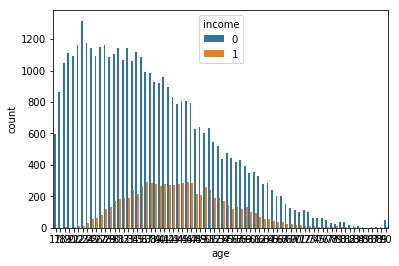

In [48]:
sns.countplot(x='age',data=df,hue='income')

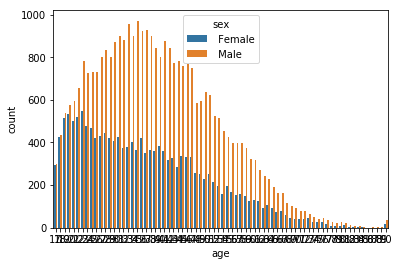

In [49]:
sns.countplot(x='age',data=df,hue='sex')

In [50]:
# Interesting, here, females are underrepresented. This could be posssibly caused by bias of data.

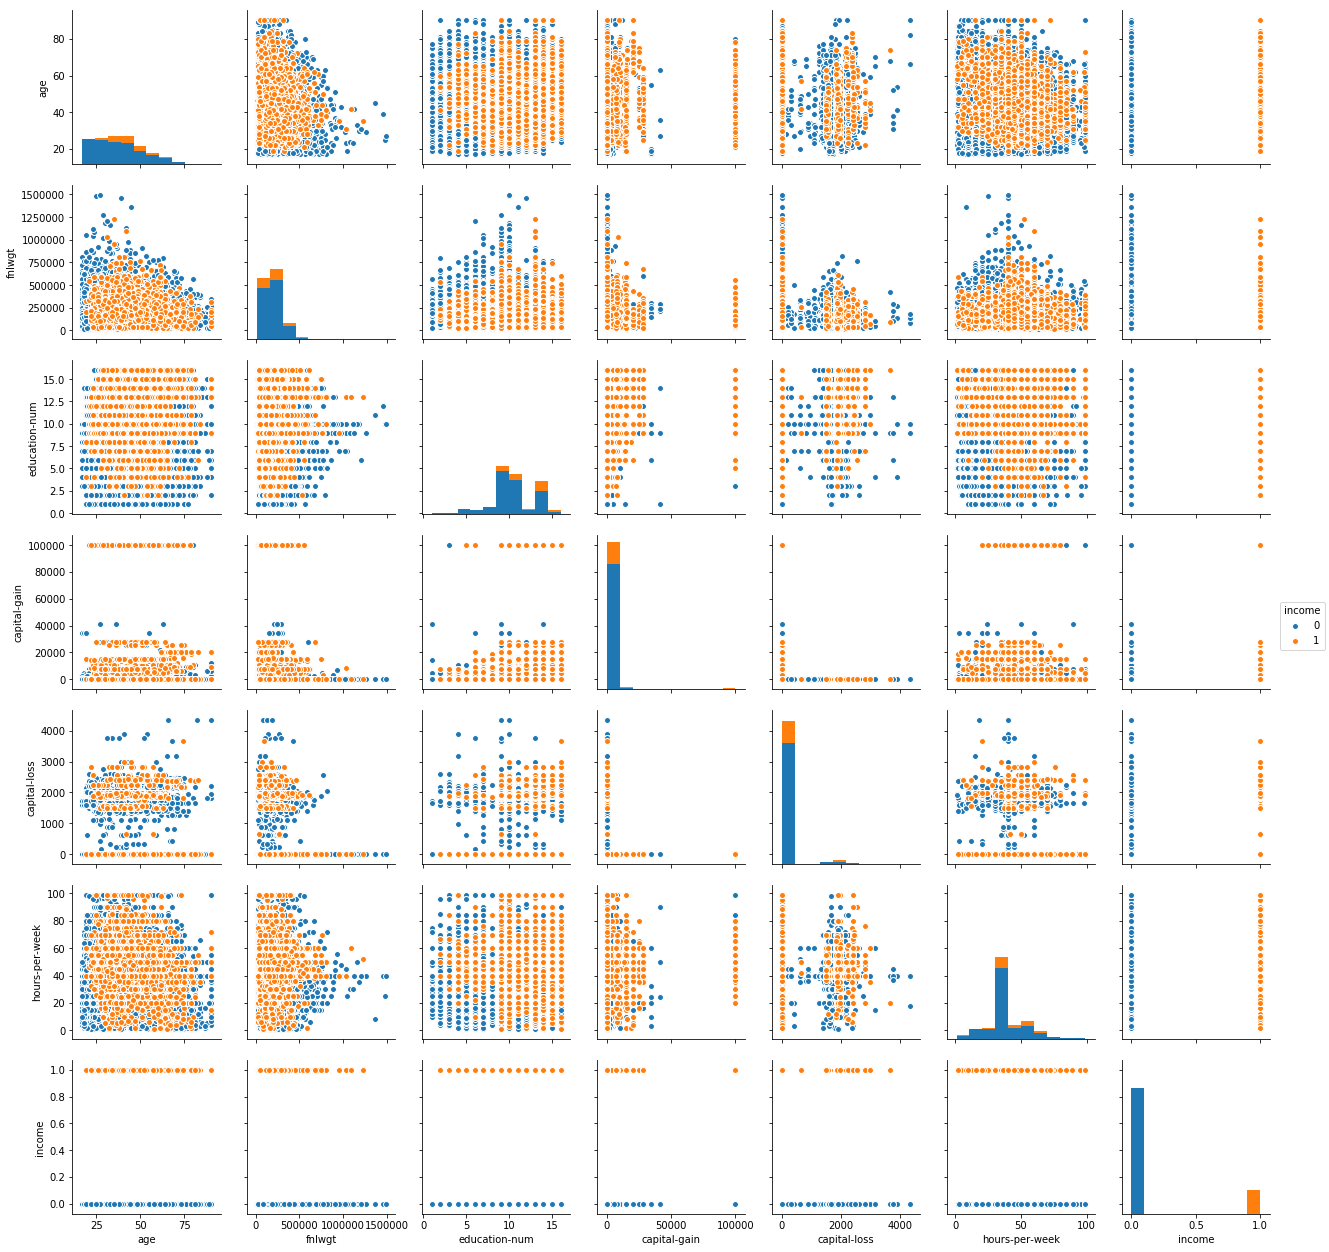

In [51]:
sns.pairplot(df,hue='income')

In [52]:
df[["education","education-num"]].head(15)

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [53]:
# From above cells we can see that two columns are actually represent the same features,but encoded 
# as string and as numbers. We don't need the string representation,so we can delete the 'education'
# column.Deleting this helps to clean the data and adds valuable information a machine learning
# algorith can be use.
del df['education']   # education number and education are highly correlated so removing one.
# and 
del df['fnlwgt']  # these have no contribution to our analysis.

In [54]:
df[['sex','relationship']].head(15)

,sex,relationship
0,Male,Not-in-family
1,Male,Husband
2,Male,Not-in-family
3,Male,Husband
4,Female,Wife
5,Female,Wife
6,Female,Not-in-family
7,Male,Husband
8,Female,Not-in-family
9,Male,Husband


In [55]:
# The above datas cell looks correlated,like for example Male and Husband are highly correlated
# value and as well Female and wife are highly correleated. There is no easy way to tackle this 
# problem. so, let move on.

KeyboardInterrupt: 

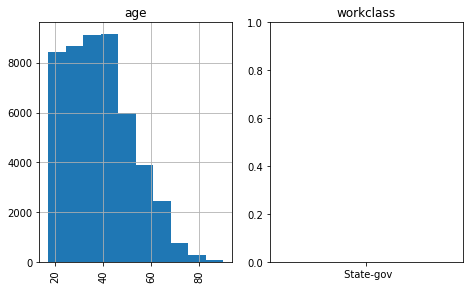

In [58]:

encoded_data,encoders=number_encode_features(df)
fig=plt.figure(figsize=(20,15))
cols=5
rows=math.ceil(float(encoded_data.shape[1])/cols)
for i, column in enumerate(encoded_data.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7,wspace=0.2)    

In [57]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


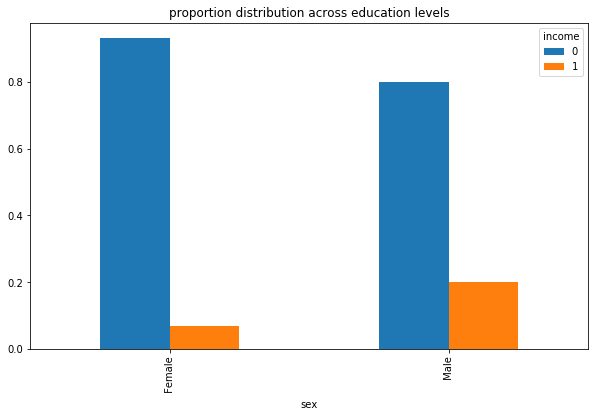

In [61]:
gender=round(pd.crosstab(df.sex,df.income).div(pd.crosstab(df.sex,df.income)
                                                       .apply(sum,1),0),2)
gender.sort_values(by=1,inplace=True)
ax=gender.plot(kind='bar',title='proportion distribution across education levels',figsize=(10,6))


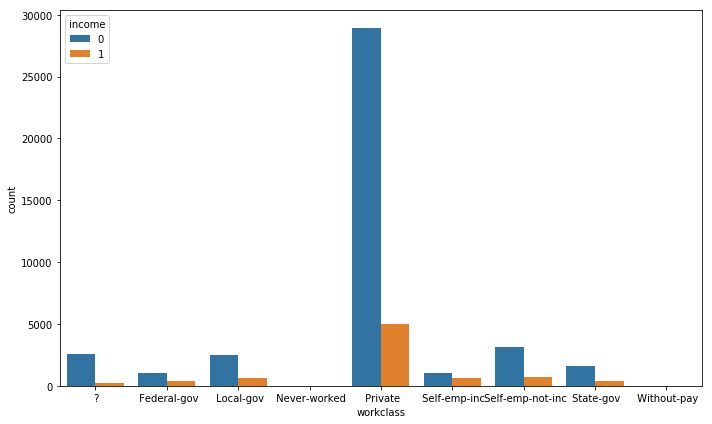

In [62]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='workclass',hue='income',data=df)
plt.tight_layout()
plt.show()


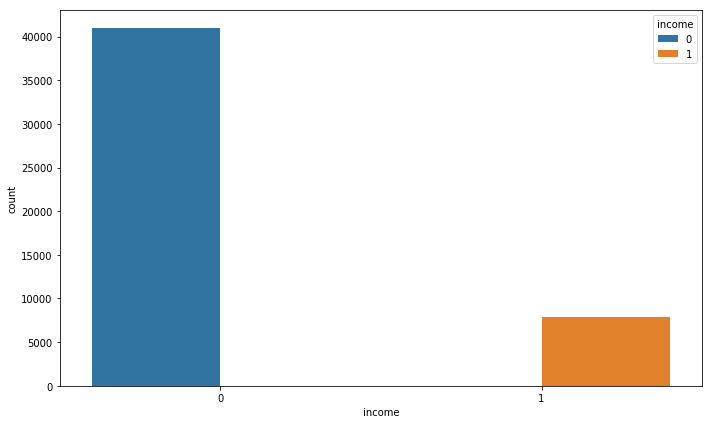

In [63]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='income',hue='income',data=df)
plt.tight_layout()
plt.show()


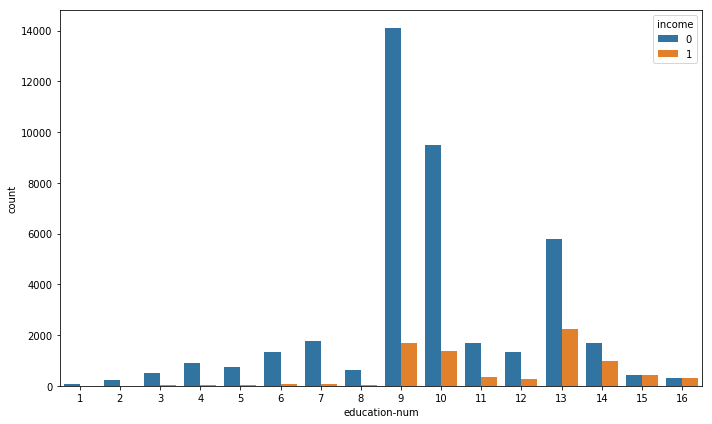

In [64]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='education-num',hue='income',data=df)
plt.tight_layout()
plt.show()


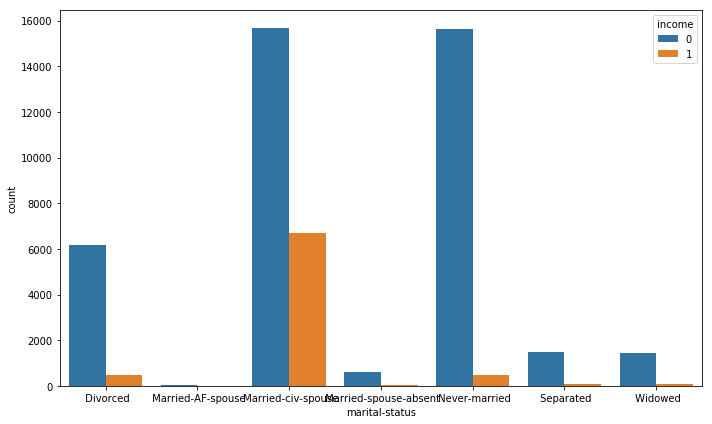

In [65]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='marital-status',hue='income',data=df)
plt.tight_layout()
plt.show()


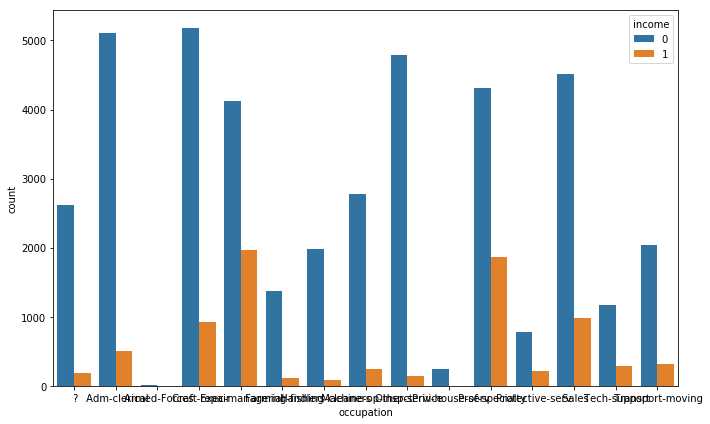

In [66]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='occupation',hue='income',data=df)
plt.tight_layout()
plt.show()


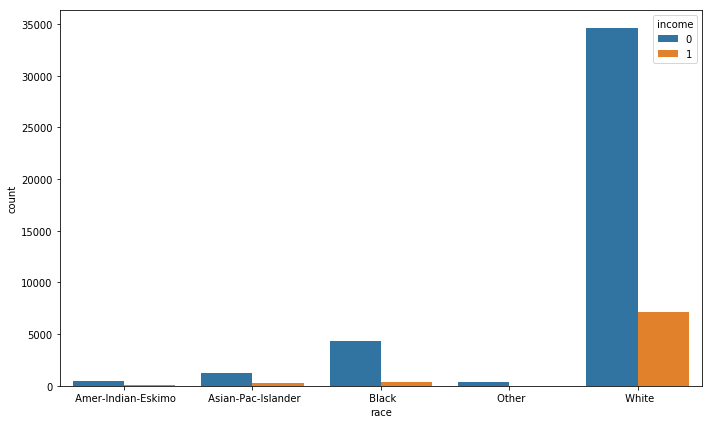

In [67]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='race',hue='income',data=df)
plt.tight_layout()
plt.show()


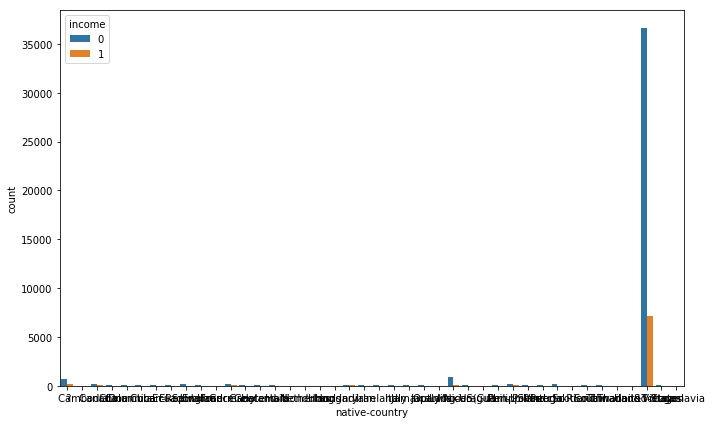

In [69]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='native-country',hue='income',data=df)
plt.tight_layout()
plt.show()


In [70]:
# From the plot we can see that south america contry are at the left end of the plot with 
# low proportion of population than make more than 50k a year. The united states has higher 
# proportion of population that make more than 50k a year.

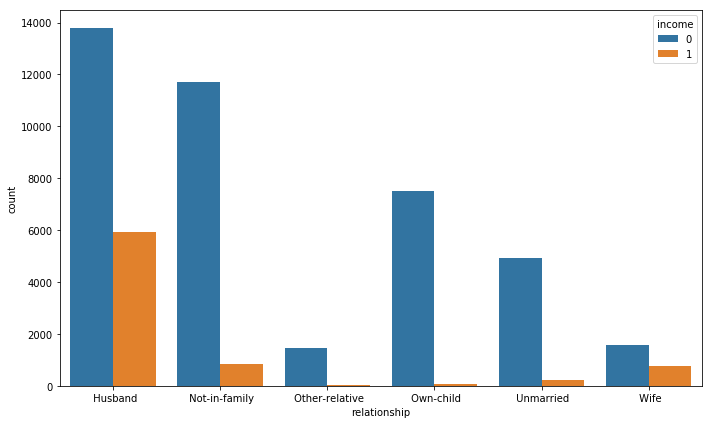

In [71]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='relationship',hue='income',data=df)
plt.tight_layout()
plt.show()


#### Model and Classification:

In [72]:
# one-hot encoding is the process of representing multi-class categorical features as binary features,
# one for each class. Although this process increases the dimensionality of the dataset,classification
# algorithms tend to work better on this format of data.

In [83]:

df_cate_1hoten=pd.get_dummies(df.select_dtypes('category'))
df_noncate=df.select_dtypes(exclude='category')
# concanate them
df_hot=pd.concat([df_cate_1hoten,df_noncate],axis=1,join='inner')
X=df_hot.drop(columns=['income'])
y=df_hot.income

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x00000265254867F0>>
Traceback (most recent call last):
  File "C:\Users\minga\Anaconda3\lib\site-packages\xgboost\core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [74]:
df_hot.head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,39,13,2174,0,40,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,50,13,0,0,13,0
2,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,38,9,0,0,40,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,53,7,0,0,40,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,28,13,0,0,40,0


In [75]:
# Train  test split 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [85]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34189, 91), (14653, 91), (34189,), (14653,))

In [87]:
###XG boost alogrithm, beacuse ther is no scaling is required 
import xgboost
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Users\minga\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [88]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11782   490]
 [ 1567   814]]


In [89]:
#score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Classification Report:\n ",classification_report(y_test, y_pred))
xgscore=accuracy_score(y_test,y_pred)

print("Score is",xgscore)

Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.96      0.92     12272
          1       0.62      0.34      0.44      2381

avg / total       0.84      0.86      0.84     14653

Score is 0.8596191906094315


In [90]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
X_train

array([[-0.2475395 , -0.17331289, -0.26453314, ..., -0.1434178 ,
        -0.21688445, -0.03946323],
       [-0.2475395 , -0.17331289, -0.26453314, ..., -0.1434178 ,
         4.71043005,  0.36338171],
       [ 4.03975934, -0.17331289, -0.26453314, ..., -0.1434178 ,
        -0.21688445, -0.03946323],
       ...,
       [-0.2475395 , -0.17331289, -0.26453314, ...,  0.8249019 ,
        -0.21688445,  0.76622664],
       [-0.2475395 , -0.17331289, -0.26453314, ..., -0.1434178 ,
        -0.21688445, -0.03946323],
       [-0.2475395 , -0.17331289, -0.26453314, ..., -0.1434178 ,
        -0.21688445,  1.16907157]])

In [92]:

X_test

array([[-0.2475395 , -0.17331289, -0.26453314, ..., -0.1434178 ,
        -0.21688445, -0.03946323],
       [-0.2475395 , -0.17331289, -0.26453314, ..., -0.1434178 ,
        -0.21688445, -0.03946323],
       [-0.2475395 , -0.17331289, -0.26453314, ..., -0.1434178 ,
        -0.21688445,  0.76622664],
       ...,
       [-0.2475395 , -0.17331289, -0.26453314, ..., -0.1434178 ,
        -0.21688445,  2.53874435],
       [-0.2475395 , -0.17331289, -0.26453314, ..., -0.1434178 ,
         6.82142417, -0.03946323],
       [-0.2475395 , -0.17331289, -0.26453314, ..., -0.1434178 ,
        -0.21688445,  0.44395069]])

In [93]:
classification=["Logistic Regression","Decision Tree","Random Forest","KNeighbour"]

In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
da = pd.DataFrame(np.arange(len(classification)).reshape(1,len(classification)), columns=classification,index=['Test Accuracy'])

for classificationAlg in classification:
    print(classificationAlg)
    if classificationAlg=="Logistic Regression":
        from sklearn.linear_model import LogisticRegression
        classifier=LogisticRegression()
        classifier.fit(X_train,y_train)
        y_predict=classifier.predict(X_test)
          
    if classificationAlg=="Decision Tree":
        from sklearn.tree import DecisionTreeClassifier
        classifier=DecisionTreeClassifier(criterion='entropy')
        classifier.fit(X_train,y_train)
        y_pred=classifier.predict(X_test)
           
    if classificationAlg=="Random Forest":
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 5,random_state=0)
        classifier.fit(X_train, y_train)
        y_pred=classifier.predict(X_test)
         
    if classificationAlg=="KNeighbour":
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors=5)
        classifier.fit(X_train, y_train)
        y_pred=classifier.predict(X_test)
         
    print("\n Classification Algorithm Name is: ",classificationAlg)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    print("\n Classification Report:\n ",classification_report(y_test, y_pred))
    score=accuracy_score(y_test,y_pred)

    print("Score is:",score)
    da.loc[:,classificationAlg] =score
#highlight_max=dfi.max()    
print("\n",da)

Logistic Regression

 Classification Algorithm Name is:  Logistic Regression
[[11782   490]
 [ 1567   814]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.96      0.92     12272
          1       0.62      0.34      0.44      2381

avg / total       0.84      0.86      0.84     14653

Score is: 0.8596191906094315
Decision Tree

 Classification Algorithm Name is:  Decision Tree
[[11019  1253]
 [ 1440   941]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.90      0.89     12272
          1       0.43      0.40      0.41      2381

avg / total       0.81      0.82      0.81     14653

Score is: 0.8162151095338839
Random Forest

 Classification Algorithm Name is:  Random Forest
[[11238  1034]
 [ 1423   958]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.89      0.92      0.90     12272
          1       0.48  

In [96]:
classifier = KNeighborsClassifier(n_neighbors=19)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
    
print("\n Classification Report:\n ",classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)

print("Score is:",score)

#updating the accuracy matrix
da["KNeighbour"]=score
print(da)

[[11699   573]
 [ 1700   681]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.87      0.95      0.91     12272
          1       0.54      0.29      0.37      2381

avg / total       0.82      0.84      0.82     14653

Score is: 0.8448781819422644
               Logistic Regression  Decision Tree  Random Forest  KNeighbour
Test Accuracy             0.859619       0.816215       0.832321    0.844878


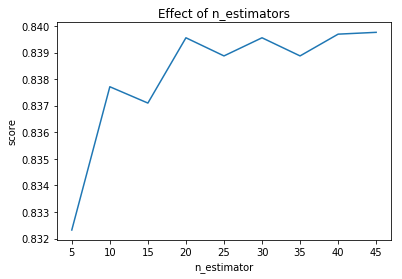

In [97]:

#changing the estimator to know at what point we get to the good accuracy
estimators = np.arange(5, 50, 5)
scores = []
for n in estimators:
    classifier = RandomForestClassifier(n_estimators = n,random_state=0)
    classifier.set_params(n_estimators=n)
    classifier.fit(X_train, y_train)
    #y_predict = regressor.predict(X_test)
    #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
    scores.append(classifier.score(X_test, y_test))
    #print(n)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [98]:
classifier = RandomForestClassifier(n_estimators = 40,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
#print("\n Classification Algorithm Name is: ",classificationAlg)
cm = confusion_matrix(y_test, y_pred)
print(cm)
    
print("\n Classification Report:\n ",classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)

print("Score is:",score)

#updating the accuracy matrix
da["Random Forest"]=score
print(da)

[[11424   848]
 [ 1501   880]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.93      0.91     12272
          1       0.51      0.37      0.43      2381

avg / total       0.82      0.84      0.83     14653

Score is: 0.8396915307445574
               Logistic Regression  Decision Tree  Random Forest  KNeighbour
Test Accuracy             0.859619       0.816215       0.839692    0.844878


In [99]:

df=da
#adding xgboost accuary values into Test accuaracy matrix
#df.insert(2,"XGBoost", xgscore) 
da["XGBoost"]=xgscore
print(da)

               Logistic Regression  Decision Tree  Random Forest  KNeighbour  \
Test Accuracy             0.859619       0.816215       0.839692    0.844878   

                XGBoost  
Test Accuracy  0.859619  


In [103]:
#dFold = pd.DataFrame(np.arange(len(classification)).reshape(1,len(classification)), columns=classification,index=['Test Accuracy'])

classifications = [
            ("Logistic Regression", LogisticRegression()),
            ("Decision Tree ",  DecisionTreeClassifier()),
            ("Random Forest",  RandomForestClassifier(n_estimators=40)),
            ("KNeighbour",  KNeighborsClassifier(19)),
            ("XGBoost", xgboost.XGBClassifier())]

dFold = pd.DataFrame(index=['Test Accuracy'])

from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score, cross_val_predict

#classification=["Logistic Regression","Decision Tree","Random Forest","KNeighbour","XGBoost"]
#classifiers=[]
scoring = 'accuracy'
results=[]
names=[]
#kfold = KFold(n_splits=10, random_state=100)
for classifier_name,model in classifications:
    accuracy =cross_val_score(model, X_train,y_train, cv=10,scoring='accuracy').mean()
    dFold[classifier_name] =accuracy
    print(classifier_name,"\n\t Accuracy :", accuracy)

C:\Users\minga\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Logistic Regression 
	 Accuracy : 0.8526719853310014
Decision Tree  
	 Accuracy : 0.813010050707924
Random Forest 
	 Accuracy : 0.8401826625074383
KNeighbour 
	 Accuracy : 0.8469391438166676


C:\Users\minga\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\minga\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\minga\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\minga\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

XGBoost 
	 Accuracy : 0.861300547263588


C:\Users\minga\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [104]:
dFold

,Logistic Regression,Decision Tree,Random Forest,KNeighbour,XGBoost
Test Accuracy,0.852672,0.81301,0.840183,0.846939,0.861301



#### Above analysis shows XGBosst give higher prediction for the given dataset